# Resolución del Examen Data Science - OPI Analytics
## Gonzalo Lima Cinta

***
### Sección C
### BOPS

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
data_bm = pd.read_csv('databases/BOPS_case/bops_bm.csv', thousands=',')

In [76]:
data_online = pd.read_csv('databases/BOPS_case/bops_online.csv', thousands=',')

In [207]:
data_bm.head()

,id (store),year,month,week,usa,after,sales
0,1,2011,4,16,0,0,118691
1,1,2011,4,17,0,0,113804
2,1,2011,4,18,0,0,172104
3,1,2011,5,19,0,0,105591
4,1,2011,5,20,0,0,94884


In [198]:
data_bm.describe()

,id (store),year,month,week,usa,after
count,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000
mean,84.738095,2011.296296,6.314815,26.796296,0.797619,0.500000
std,49.434118,0.456674,3.479549,15.228823,0.401819,0.500055
min,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,42.500000,2011.000000,3.000000,14.000000,1.000000,0.000000
50%,84.000000,2011.000000,6.000000,26.500000,1.000000,0.500000
75%,127.500000,2012.000000,9.000000,40.000000,1.000000,1.000000
max,169.000000,2012.000000,12.000000,53.000000,1.000000,1.000000


In [208]:
data_bm.rename(columns={"id (store)": "idStore"},inplace = True)

In [154]:
data_online.describe()

,idDMA,year,month,week,after,close,sales
count,10710.000000,10710.000000,10710.000000,10710.00000,10710.000000,10710.000000,10710.000000
mean,105.500000,2011.274510,6.450980,27.45098,0.490196,0.480952,13755.704855
std,60.623921,0.446288,3.533278,15.42074,0.499927,0.499660,22411.737794
min,1.000000,2011.000000,1.000000,1.00000,0.000000,0.000000,63.000000
25%,53.000000,2011.000000,3.000000,13.00000,0.000000,0.000000,1144.000000
50%,105.500000,2011.000000,7.000000,28.00000,0.000000,0.000000,5567.500000
75%,158.000000,2012.000000,10.000000,41.00000,1.000000,1.000000,17185.750000
max,210.000000,2012.000000,12.000000,53.00000,1.000000,1.000000,319233.000000


In [81]:
data_online.rename(columns={"id (DMA)": "idDMA"},inplace = True)

In [209]:
data_online['date']=data_online['year'].astype(str) + data_online['month'].astype(str).str.zfill(2)
data_online['date'] = pd.to_datetime(data_online['date'], format='%Y%m')
data_bm['date']=data_bm['year'].astype(str) + data_bm['month'].astype(str).str.zfill(2)
data_bm['date'] = pd.to_datetime(data_bm['date'], format='%Y%m')

In [147]:
data_online.head()

,idDMA,year,month,week,after,close,sales,date
0,1,2011,4,17,0,1,18564,2011-04-01
1,1,2011,4,18,0,1,30883,2011-04-01
2,1,2011,5,19,0,1,37425,2011-05-01
3,1,2011,5,20,0,1,32563,2011-05-01
4,1,2011,5,21,0,1,35773,2011-05-01


***
__Análisis en tienda online__

In [165]:
#linea de prueba
data_online.groupby(["after","close","date"])['sales'].sum().reset_index().describe()

,after,close,sales
count,26.000000,26.000000,26.000000
mean,0.461538,0.500000,5.666292
std,0.508391,0.509902,2.091697
min,0.000000,0.000000,2.611444
25%,0.000000,0.000000,3.885421
50%,0.000000,0.500000,5.699560
75%,1.000000,1.000000,6.935042
max,1.000000,1.000000,10.398055


In [164]:
data_online["sales"]=data_online["sales"]/1000000

Ventas en millones de dolares

after  close
0      0        [AxesSubplot(0.125,0.125;0.775x0.755)]
       1        [AxesSubplot(0.125,0.125;0.775x0.755)]
1      0        [AxesSubplot(0.125,0.125;0.775x0.755)]
       1        [AxesSubplot(0.125,0.125;0.775x0.755)]
dtype: object

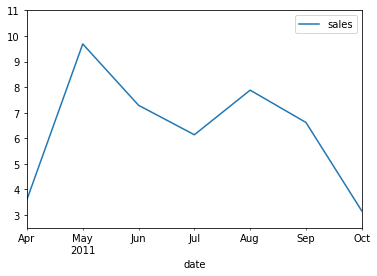

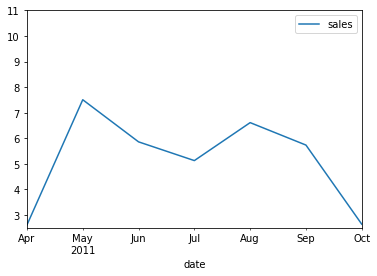

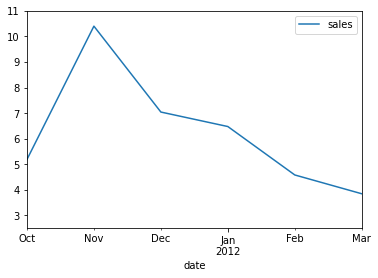

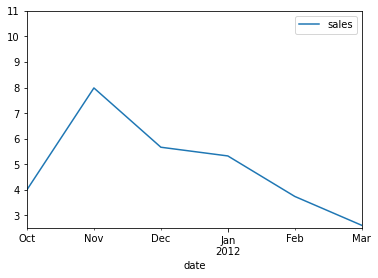

In [173]:
data_online.groupby(["after","close","date"])['sales'].sum().reset_index().groupby(["after","close"])\
.plot.line(x="date", y="sales", ylim=(2.5,11), subplots=True)

Graficas sin separar la categoría "close"

In [174]:
data_online.groupby(["after","date"])['sales'].sum().reset_index().groupby(["after"]).describe()

sales                                                                 \
      count       mean       std       min       25%        50%        75%   
after                                                                        
0       7.0  11.495516  4.188129  5.801892  8.740495  12.351809  13.820819   
1       6.0  11.142498  4.218271  6.459044  8.539037  10.493383  12.479225   

                  
             max  
after             
0      17.192284  
1      18.380415

after
0    [AxesSubplot(0.125,0.125;0.775x0.755)]
1    [AxesSubplot(0.125,0.125;0.775x0.755)]
dtype: object

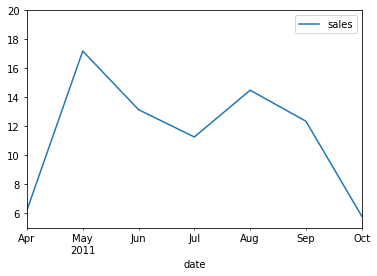

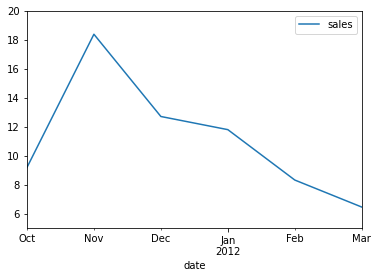

In [175]:
data_online.groupby(["after","date"])['sales'].sum().reset_index().groupby(["after"])\
.plot.line(x="date", y="sales", ylim=(5,20), subplots=True)

In [229]:
data_online.groupby(["after","close"])['sales'].sum().reset_index().head()

,after,close,sales
0,0,0,44.378032
1,0,1,36.090582
2,1,0,37.525951
3,1,1,29.329034


***
__Análisis en tiendas B&M__


In [222]:
data_bm[data_bm['usa']==1].groupby(["after","usa","date"])['sales'].sum().reset_index().describe()

,after,usa,sales
count,14.000000,14.0,14.000000
mean,0.500000,1.0,16.656165
std,0.518875,0.0,4.574214
min,0.000000,1.0,7.376057
25%,0.000000,1.0,12.967300
50%,0.500000,1.0,17.079362
75%,1.000000,1.0,20.190428
max,1.000000,1.0,23.522551


In [212]:
data_bm["sales"]=data_bm["sales"]/1000000

Venta en Millones de dolares

after
0    [AxesSubplot(0.125,0.125;0.775x0.755)]
1    [AxesSubplot(0.125,0.125;0.775x0.755)]
dtype: object

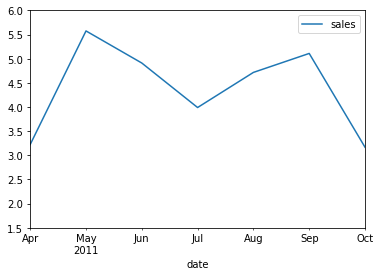

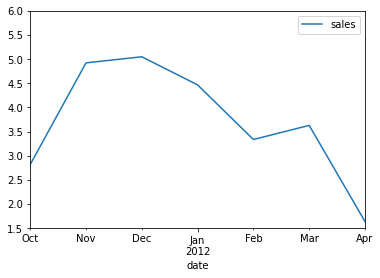

In [220]:
#Ventas en Canadá
data_bm[data_bm['usa']==0].groupby(["after","date"])['sales'].sum().reset_index().groupby(["after"])\
.plot.line(x="date", y="sales", ylim=(1.5,6), subplots=True)

after
0    [AxesSubplot(0.125,0.125;0.775x0.755)]
1    [AxesSubplot(0.125,0.125;0.775x0.755)]
dtype: object

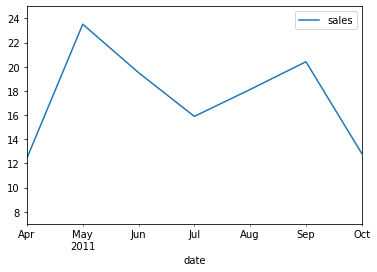

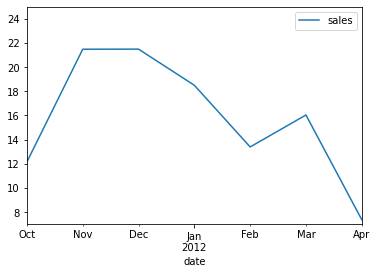

In [223]:
#Ventas en USA
data_bm[data_bm['usa']==1].groupby(["after","date"])['sales'].sum().reset_index().groupby(["after"])\
.plot.line(x="date", y="sales", ylim=(7,25), subplots=True)

In [230]:
data_bm.groupby(["after","usa"])['sales'].sum().reset_index().head()

,after,usa,sales
0,0,0,30.689777
1,0,1,122.730695
2,1,0,25.853285
3,1,1,110.455609


***
__1. ¿Deberían expandirse a Canadá?__

El programa BOPS iniciado en octubre, funcionó correctamente el primer mes aumentando las ventas en gran medida.
Puede no ser concluyente el comparar 2 periodos de fechas independientes y pensar que una nueva implementación es el unico factor.
Se debería de realizar este mismo análisis con datos históricos de ventas para detectar patrones estacionales no ralcionados con la nueva implementación.
Por otro lado, en Canadá no hubo implementación del programa BOPS y aun así las ventas se redujeron, por lo tanto, la reducción en las ventas pudo no haberse dado en absoluto por la implementación del programa.

***
__2. ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tu
razonamiento y metodología.__

Desde la implementación del programa, las ventas online en el periodo de 6 meses se redujeron casi 14 millones (17%) de dólares y se redujeron en 17 millones (11%) para las tiendas B&M. De nuevo, no es concluyente por no poder comparar con los respectivos meses del año anterior.
Se realizaron totalizadores de antes y después de la implementación, tomando en cuenta si las tiendas estában a menos de 50 millas (en el caso online) y de igual manera para tienes en USA y Canadá.
El aumento en el periodo de Noviembre también pudo haberse dado por el Black Friday que se realiza a finales de noviembre